In [1536]:
import os
import glob
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1580]:
files = [
    'output/duwmmse_adam_set1_UMa_Optional_square_n25_lim500_thr1_fading1_lr1e-02_reg0.0_mu0.txt',
    'output/uwmmse_adam_set1_UMa_Optional_square_n25_lim500_thr1_fading1_lr1e-02_reg0.0_mu0.txt',
#     'output/duwmmse_adam_set2_dynamic_lr5e-04_gc4.0_dynamic_training_v2.txt',
#     'output/uwmmse_adam_set2_dynamic_lr5e-04_gc4.0_dynamic_training_v2.txt'
]

In [1581]:
name_map = {'uwmmse': 'UWMMSE_centralized',
           'duwmmse': 'UWMMSE_distributed'}

In [1582]:
# vals_c, vals_d = [], []
# names_c, names_d = [], []
results = {'UWMMSE_centralized': [],
          'UWMMSE_distributed': []}
for file in files:
    name = file.split(os.sep)[-1]
    with open(file, 'r') as f:
        s = list(f)
        sum_rate = []
        for s_i in s:
            if 'Test Average Sum_rate' in s_i:
                sum_rate_i = re.split("Test Average Sum_rate = (\d+.\d+)", s_i)[1]
                sum_rate.append(float(sum_rate_i))
        algo_name = name.split('_')[0]
        results[name_map[algo_name]] = sum_rate

In [1583]:
results['UWMMSE_centralized'] = [15.684013] + results['UWMMSE_centralized']
results['UWMMSE_distributed'] = [15.684013] + results['UWMMSE_distributed']

In [1591]:
np.array(results['UWMMSE_centralized'])*5

array([78.420065, 87.320555, 91.564065, 93.326225, 94.06063 , 94.38125 ,
       94.635115, 94.79975 , 94.944715, 95.06804 , 95.193085, 95.323095,
       95.46456 , 95.50115 , 95.511695, 95.690715, 95.80164 , 95.92891 ,
       95.999645, 96.086785, 96.12329 , 96.122355, 96.234805, 96.148195,
       96.201215, 96.24237 , 96.202905, 96.22638 , 96.25411 , 96.228345,
       96.236055, 96.30072 , 96.28387 , 96.23144 , 96.224295, 96.230045,
       96.260365, 96.327835, 96.354325, 96.276645, 96.26461 , 96.335475,
       96.256115, 96.289535, 96.38517 , 96.3531  , 96.37998 , 96.38128 ,
       96.336   , 96.327005, 96.411845, 96.44898 , 96.38155 , 96.38762 ,
       96.442565, 96.43167 , 96.4199  , 96.43791 , 96.443835, 96.409225,
       96.459275, 96.429405, 96.427385, 96.443615, 96.536285, 96.512545,
       96.55721 , 96.547935, 96.50999 , 96.405945, 96.5732  , 96.595765,
       96.456205, 96.475705, 96.60159 , 96.637865, 96.58954 , 96.611615,
       96.554995, 96.561115, 96.616325, 96.63733 , 

In [1585]:
results['UWMMSE_centralized'] = results['UWMMSE_centralized'][:125]
results['UWMMSE_distributed'] = results['UWMMSE_distributed'][:125]

In [1586]:
# results_wmmse = {  # square, w/o thresholding
#     'WMMSE': 20.384,  # bps/Hz
#     'WMMSE-Tr': 16.464,
# }
results_wmmse = {  # square, w/ thresholding
    #'WMMSE': 20.471,  # bps/Hz
    'WMMSE-Tr': 16.469,
}

In [1587]:
bandwidth = 5  # MHz

In [1588]:
linestyles = {'UWMMSE_centralized': 'solid', 
              'UWMMSE_distributed': 'solid', 
              'WMMSE': 'dashed', 
              'WMMSE-Tr': 'dotted'
             }

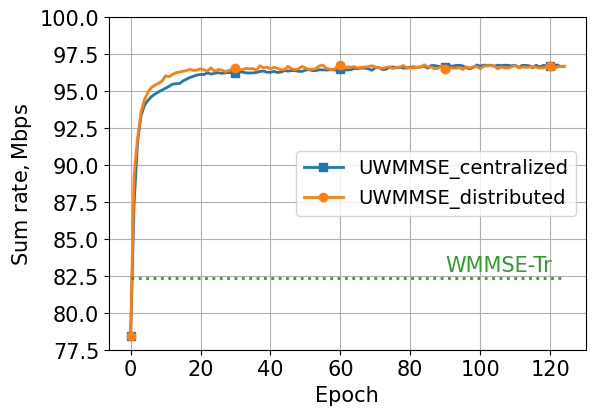

In [1596]:
fig, ax = plt.subplots(1, 1, figsize=(5.8, 4))
markers = ['s', 'o', '*', '^', '>', '<', 'v', 'p', '8', 'h', 'H']
for i, (k, v) in enumerate(results.items()):
    v = np.array(v)*bandwidth
    plt.plot(v, label=k, marker=markers[i], markevery=30, lw=2, linestyle=linestyles[k])
for i, (k, v) in enumerate(results_wmmse.items()):
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    v = np.full_like(results['UWMMSE_centralized'], v)*bandwidth
    plt.plot(v, markevery=30, lw=2, color=color, linestyle=linestyles[k])
    c = -1.5 if k == 'WMMSE' else 0.5
    plt.text(90, v[1] + c, k, color=color, fontsize=15)
plt.grid()
plt.ylabel('sumrate')
plt.xlabel('epoch')
plt.legend()
plt.xlabel('Epoch', fontsize=15)  # Increase x-axis label font size
plt.ylabel(r'$\mathrm{Sum\,\,rate}, \mathrm{Mbps}$', fontsize=15)
plt.legend(title=None, fontsize=14, ncols=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([77.5, 100])
plt.tight_layout(pad=0.15)
plt.savefig('output/fig/uwmmse_conv_square_lr1e-2.pdf')
plt.show()